# Linear Model Implementation From Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Prepration

In [2]:
data = 'https://raw.githubusercontent.com/Kartikeya-Raghuvanshi/Linear_Models/main/data.csv'
#importing the data form my github directory

In [3]:
df = pd.read_csv(data)

In [4]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# editing the names of columns so that it is easier to call on them and make it consistant

In [6]:
cols = df.dtypes[df.dtypes == 'object'].index
cols

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [7]:
for c in cols:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='msrp', ylabel='Count'>

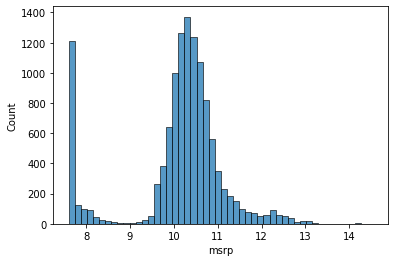

In [10]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)
# looks more like a normal plot and models woks generally better on that
# thus it is better to work in the log values of the prices

## Dividing the dataframe for test and validation 

Dividing the test data into 3 parts do that we can first train the data and see how it performs,
second is the validation data to see if we go just lucky on the train data or have we over fitted the data,
next is the test data in which we actually see how the data performs.
But before that we combine the trian and the validation data as it has served its purpose and we have more data to train and make better prediction.

In [11]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [12]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [13]:
#for creating a random data
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

Randomising the data is important to make sure that the model dosnt pickups on any unwanted patterns in the data like order in which the data is recorded.

Setting a random seed so that the result is reproducible

In [14]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [15]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [16]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [17]:
# removing the target column
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Using Matrix manipulation to solve for a linear model

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [19]:
#creating a basic model

In [20]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [21]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## Training the model on basic features (numerical)

In [22]:
features = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
# these are the features that we can optimise for now (basically including the numeric type data)
X_train = df_train[features].fillna(0).values

In [23]:
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

## RMSE

In [24]:
def rmse(y_act, y_pred):
    se = (y_act - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [25]:
rmse(y_train,y_pred)

0.7570200472453602

In [26]:
#validating the model 

In [27]:
X_val = df_val[features].fillna(0).values

y_pred = w0 + X_val.dot(w)

In [28]:
rmse(y_val,y_pred)

0.7398184285113428

In [29]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [30]:
#creating another function to prepare X matrix for regression
# adding more features to improve the performance of the model
def prep_X(df):
    df = df.copy()
    #copying the df so that the origiinal dosn't get changed
    features_new = features.copy()
    
    
    df['age'] = 2017 - df['year']
    features_new.append('age')
    
    df_num = df[features_new]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [31]:
X_train = prep_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prep_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

#improvement in the model

0.5133241025826359

In [32]:
df_train.number_of_doors.value_counts()

4.0    4990
2.0    1926
3.0     230
Name: number_of_doors, dtype: int64

In [33]:
categorical_columns = df_train.dtypes[df_train.dtypes == 'object'].index
categorical_columns

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [34]:
df_train[categorical_columns].nunique()
#for one-hot encoding not all can be converted into a seperate colunm

make                  48
model                880
engine_fuel_type       9
transmission_type      5
driven_wheels          4
market_category       69
vehicle_size           3
vehicle_style         16
dtype: int64

In [35]:
cate = {}

for c in categorical_columns:
    cate[c] = list(df_train[c].value_counts().head().index)
cate

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [36]:
def prep_X(df):
    df = df.copy()
    features_new = features.copy()
    
    
    df['age'] = 2017 - df['year']
    features_new.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features_new.append('num_doors_%d' % v)
    
    for name, values in cate.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features_new.append('%s_%s' % (name, value))
    
    df_num = df[features_new]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [37]:
X_train = prep_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prep_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

#this huge error is actually because the matrix that we got was actually non invertalbe

66.71741012928345

In [38]:
# making small change in the matrix (by adding a small fraction of identity matrix so that there is no large effect on the values)
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + 0.01 * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [39]:
X_train = prep_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prep_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.450238009315843

## Using the model to predict the test data

In [40]:
#combining the validation with the train data as the validation data has served its purpose 
df_full_train = pd.concat([df_train,df_val])
y_full_train = np.concatenate([y_train, y_val])

In [41]:
df_full_train = df_full_train.reset_index(drop=True)

In [42]:
X_full_train = prep_X(df_full_train)
w0, w = train_linear_regression(X_full_train, y_full_train)

X_test = prep_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score.round(4)

0.4442

In [50]:
# the RMSE of the final model is 0.4442